# Задача №3 - Пробки в городе

Реализуйте функцию, которая поворачивает изображение вокруг заданной точки на заданный угол ($0^\circ-360^\circ$) и преобразует размер изображения, чтобы оно не обрезалось после поворота.

In [1]:
# импорт модулей
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np

## Функция для отрисовки изображения

Используем заранее написанную функцию plot_one_image для отображения картинок.

In [2]:
def plot_one_image(image: np.ndarray, title: str) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция

    :param image: изображение для отображения
    :param title: заголовок для изображения
    :return: None
    """
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))

    plt.title(title)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    plt.show()

## Решение

Загрузим первое изображение и выведем его.

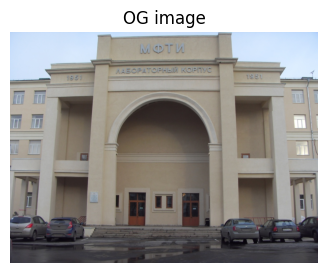

In [3]:
path = r'images//lk.jpg'

img = cv2.imread(cv2.samples.findFile(path))

if img is None:
    sys.exit("Could not read the image.")

plot_one_image(image=img, title='OG image')

Определим, вокруг какой точки и на какой угол будем поворачивать изображение. Возьмём значения из примера - вращение вокруг точки [200, 200] на 15 градусов.

In [4]:
rotation_point = (200, 200)
rotation_angle = 15

"Вытащим" из картинки её высоту и ширину, а также определим местоположение углов картинки.

In [5]:
height, width = img.shape[:2]

corners = np.array(
    [
        [width - 1, height - 1],
        [0, 0],
        [width - 1, 0],
        [0, height - 1]
    ]
)

Умножение матрицы поворота на массив координат точек — это эффективный способ применения поворота ко всем точкам одновременно, используя линейную алгебру. Поэтому нам нужна матрица поворота и массив координат точек, в роли которого в данном случае будет выступать `corners`.

Создадим матрицу поворота (с помощью встроенной в OpenCV функции `getRotationMatrix2D`) и умножим её на `corners` (перед этим добавив ей массив из единиц, поскольку он обладает размерностью 2x3, а `corners` 4x2).

Затем перемножим их.

In [6]:
rotation_matrix = cv2.getRotationMatrix2D(rotation_point, rotation_angle, 1)

rotation = np.hstack((corners, np.ones((corners.shape[0], 1))))

rotated = rotation_matrix @ rotation.T

Необходимо, чтобы начало координат нового изображения (после поворота) находилось в левом верхнем углу. Для этого мы сместим верхний левый угол путём корректировки матрицы поворота - поэлементного вычитания из неё координат (x, y) самой левой и самой верхней точек среди всех четырех углов повернутого изображения.

In [7]:
rotation_matrix[:, 2] -= rotated.min(axis=1)

Определим размер нового изображения, чтобы не потерять углы после поворота. Для этого найдём максимальные координаты x и y, вычтем минимальные координаты (получим тем самым новый размер), округлим вверх до ближайшего целого и преобразуем это в целочисленный массив.

In [8]:
new_size = np.int64(np.ceil(rotated.max(axis=1) - rotated.min(axis=1)))

Выполним афинное преобразование с помощью встроенной в OpenCV функции `warpAffine`. 

In [9]:
rotated_img = cv2.warpAffine(img, rotation_matrix, new_size)

Выведем результат.

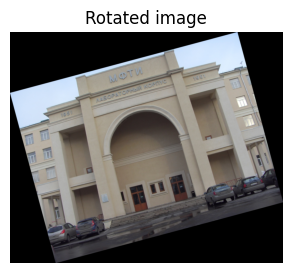

In [10]:
plot_one_image(image=rotated_img, title='Rotated image')

## Функция

Опишем весь код в виде единой функции, чтобы им было удобнее пользоваться.

In [11]:
def rotate(path_to_image, rotation_point: tuple, rotation_angle: float) -> np.ndarray:
    """
    Повернуть картинку по часовой стрелке на указанный угол без потери углов

    :param path_to_image: путь к картинке
    :param rotation_point: точка вращения картинки
    :param rotation_angle: угол вращения картинки
    :return: повёрнутая картинка
    """

    img = cv2.imread(cv2.samples.findFile(path_to_image))

    if img is None:
        sys.exit("Could not read the image.")


    height, width = img.shape[:2]

    corners = np.array(
        [
            [width - 1, height - 1],
            [0, 0],
            [width - 1, 0],
            [0, height - 1]
        ]
    )

    rotation_matrix = cv2.getRotationMatrix2D(rotation_point, rotation_angle, 1)

    rotation = np.hstack((corners, np.ones((corners.shape[0], 1))))

    rotated = rotation_matrix @ rotation.T

    rotation_matrix[:, 2] -= rotated.min(axis=1)

    new_size = np.int64(np.ceil(rotated.max(axis=1) - rotated.min(axis=1)))

    rotated_img = cv2.warpAffine(img, rotation_matrix, new_size)

    return rotated_img

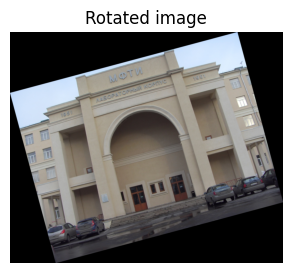

In [12]:
path = r'images//lk.jpg'
result = rotate(path, rotation_point=(200, 200), rotation_angle=15)

plot_one_image(image=result, title="Rotated image")